In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

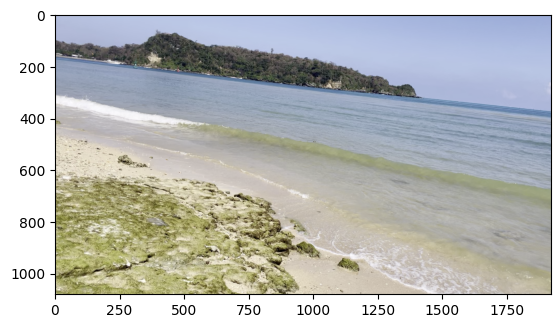

In [3]:
cap = cv2.VideoCapture('imgs/scene.MOV')
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Create some random colors
color = np.random.randint(0,255,(100,3))

# Take first frame and find corners in it
ret, old_frame = cap.read()
plt.imshow(cv2.cvtColor(old_frame, cv2.COLOR_BGR2RGB))
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)

### 説明
上記動画の隣接フレーム間のオプティカルフローを計算し、そのオプティカルフローを最後のフレームまで描画する

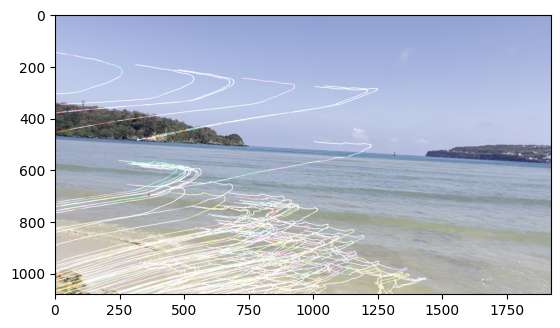

In [15]:
#特徴点を検出
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)

while(1):
    ret,frame = cap.read()
    if (ret == False):
       break
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    # Select good points
    good_new = p1[st==1]
    good_old = p0[st==1]

    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new,good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv2.line(mask, (int(a),int(b)),(int(c),int(d)), color[i].tolist(), 2)
        frame = cv2.circle(frame,(int(a),int(b)),5,color[i].tolist(),-1)
    img = cv2.add(frame,mask)

    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

cap.release()